# Import Modules and Load Root Data
Call this just once, so create copies of the data if to use and modify 

In [27]:
# where is it ?

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
train_df_full = pd.read_csv('train.csv')#'/kaggle/input/playground-series-s4e9/train.csv')
test_df_full = pd.read_csv('test.csv')#'/kaggle/input/playground-series-s4e9/test.csv')

# Globals, Styling Information
set colors and other things

# Initial Data Visualizations
columns = 'id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'

In [3]:
print(train_df_full.shape)
test_df_full.shape

(188533, 13)


(125690, 12)

In [4]:
train_df_full.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [5]:
df = train_df_full
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [12]:
[type(x) for x in df.iloc[1, :]]

[numpy.int64,
 str,
 str,
 numpy.int64,
 numpy.int64,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 numpy.int64]

In [19]:
# corruption of the data, the nans 
df.isna().sum(axis=0)

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [26]:
print('unique values')
for col in df.columns:
    print(f'{col}: ', df[col].value_counts().shape[0])

unique values
id:  188533
brand:  57
model:  1897
model_year:  34
milage:  6651
fuel_type:  7
engine:  1117
transmission:  52
ext_col:  319
int_col:  156
accident:  2
clean_title:  1
price:  1569


Matplotlib is building the font cache; this may take a moment.


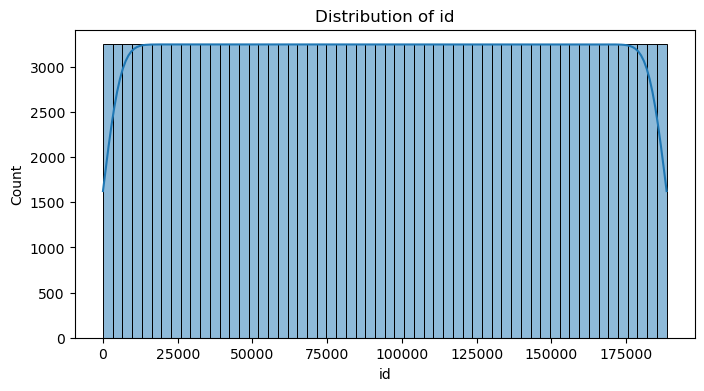

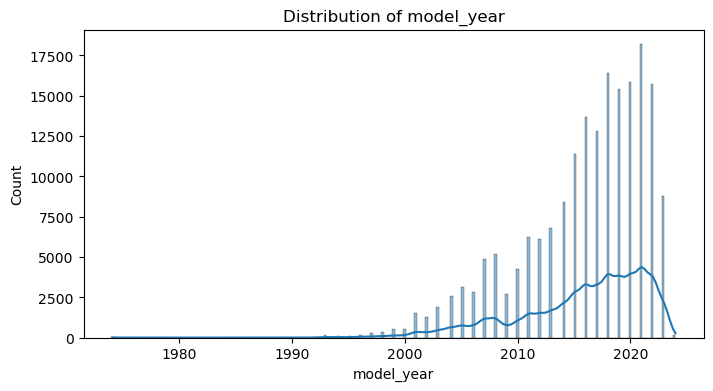

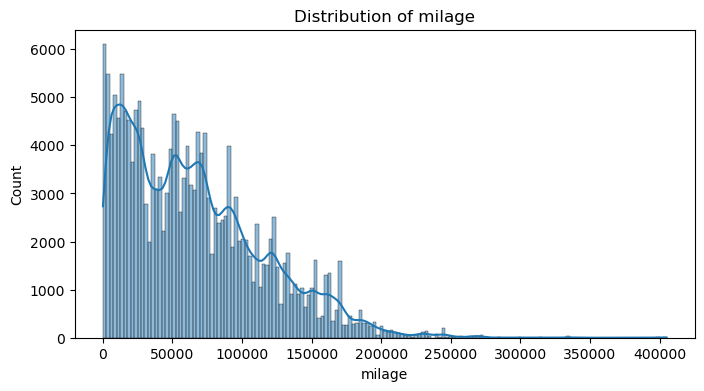

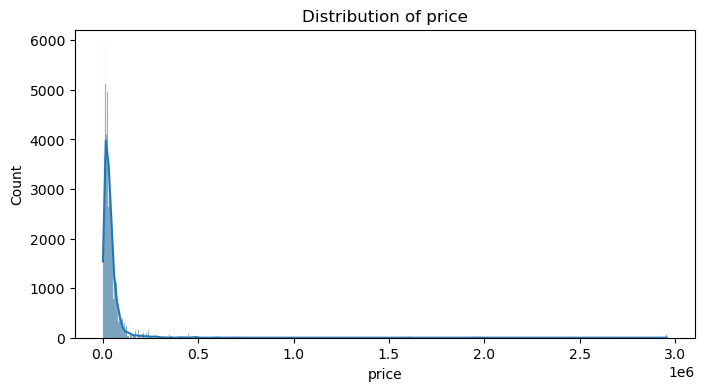

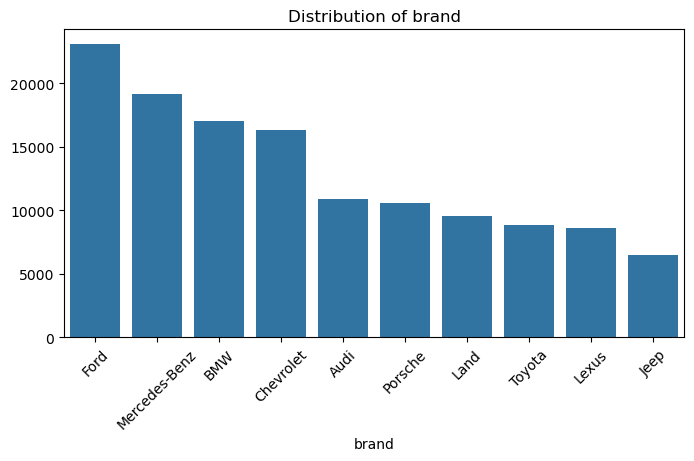

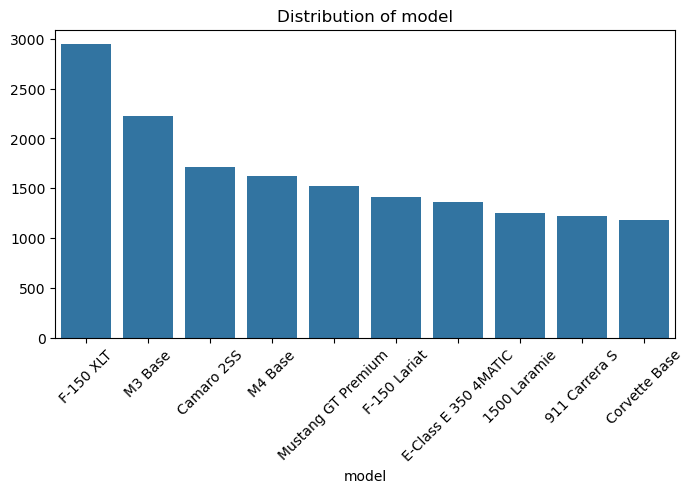

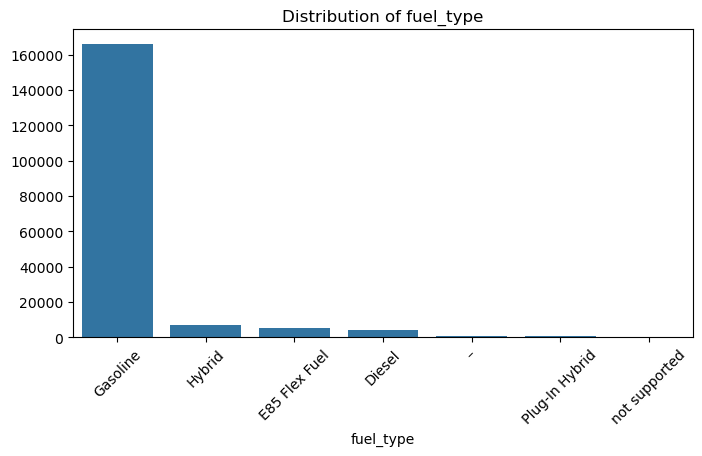

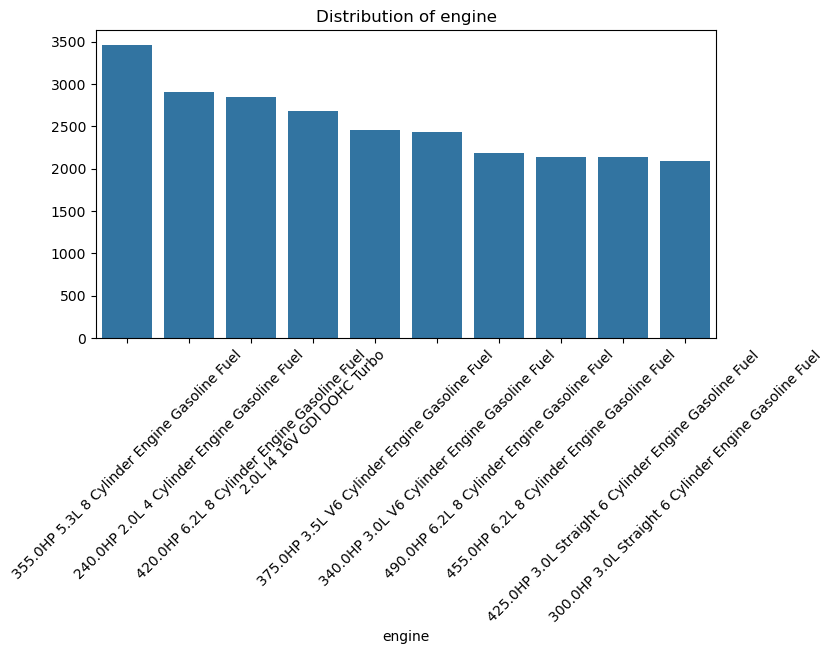

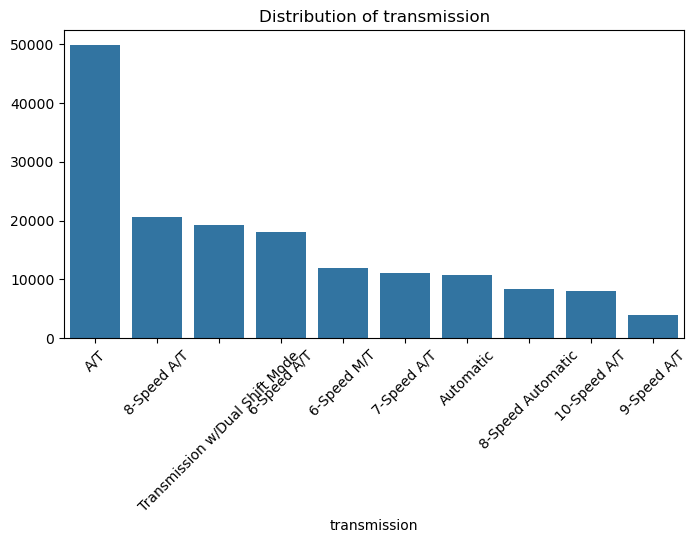

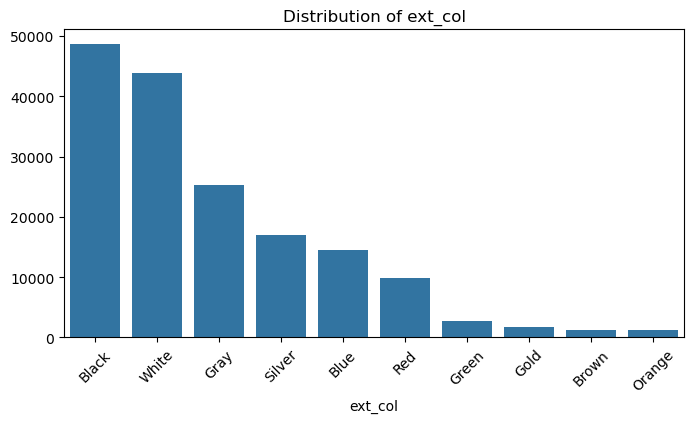

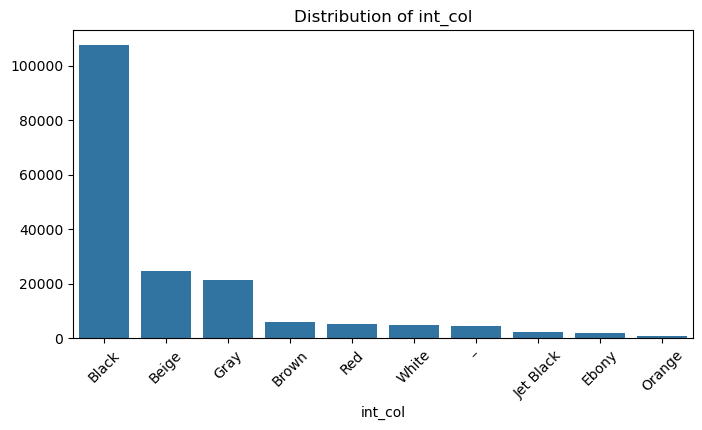

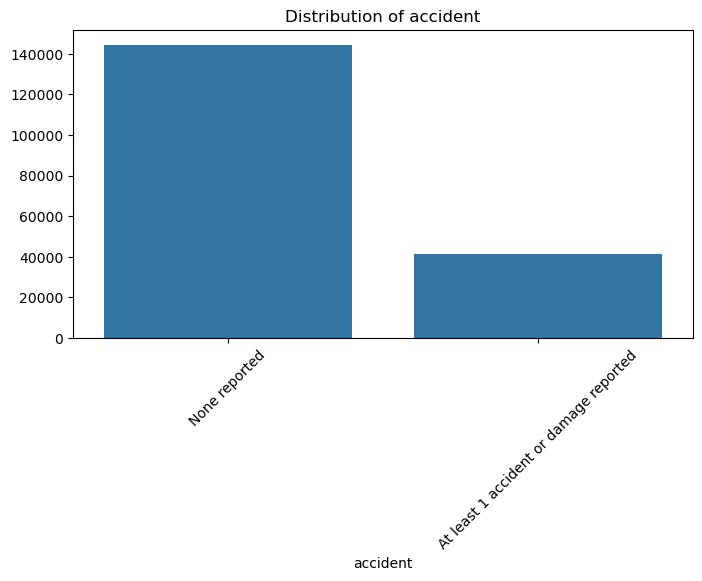

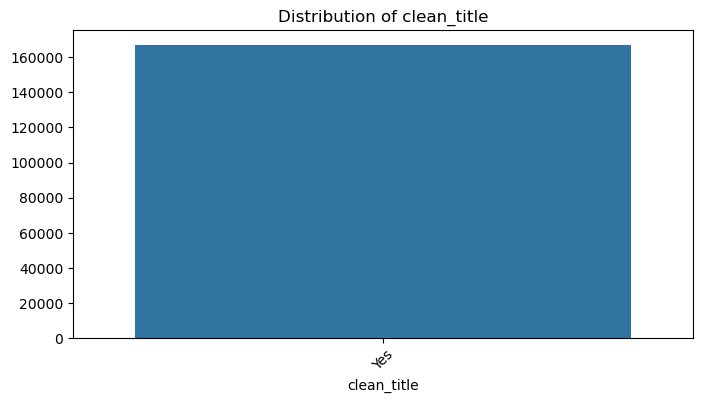

In [28]:
# distribution on numerical features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df, N=10):
    # Separate numerical and categorical columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Plot for numerical columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

    # Plot for categorical columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        value_counts = df[col].value_counts()
        
        if len(value_counts) <= N:
            sns.barplot(x=value_counts.index, y=value_counts.values)
        else:
            sns.barplot(x=value_counts.index[:N], y=value_counts.values[:N])
            plt.title(f'Distribution of {col} (Top {N})')
        
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {col}')
        plt.show()

plot_distributions(df, N=10)
# Example usage
# df = pd.read_csv('your_file.csv')
# plot_distributions(df, N=10)


# Building the Processed Dataset
Need some function that can work on the train and test. 

NA shall be mapped to the 0 value for all

unique values
id:  188533
brand:  57
model:  1897
model_year:  34
milage:  6651
fuel_type:  7
engine:  1117
transmission:  52
ext_col:  319
int_col:  156
accident:  2
clean_title:  1
price:  1569

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def process_train_features(df, N=10):
    #print('Processing training data...')
    
    # Store the top N categories for each categorical column
    categorical_top_n = {}
    
    # Store individual scalers for each column
    column_scalers = {}

    # Numerical columns: replace NaNs with -1 and scale them
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        df[col] = df[col].fillna(-1)
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])  # Use [[col]] to keep the DataFrame structure
        column_scalers[col] = scaler  # Save the scaler for this column

    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        value_counts = df[col].value_counts()
        
        # Determine top N categories, or all categories if less than N exist
        if len(value_counts) <= N:
            top_n_values = value_counts.index
        else:
            top_n_values = value_counts.index[:N]
        
        categorical_top_n[col] = top_n_values
        
        # Apply transformation
        df[col] = df[col].apply(lambda x: N if x not in top_n_values else top_n_values.get_loc(x))
        df[col] = df[col].fillna(N + 1)
        
        # Scale the categorical encoding (optional, but we scale it like the other features)
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
        column_scalers[col] = scaler  # Save the scaler for this column

    #print('Training data processed.')
    return df, categorical_top_n, column_scalers  # Return column scalers

def process_test_features(df, categorical_top_n, column_scalers, N=10):
    #print('Processing test data...')
    
    # Numerical columns: replace NaNs with -1 and apply scaling
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        df[col] = df[col].fillna(-1)
        scaler = column_scalers[col]
        df[col] = scaler.transform(df[[col]])  # Use the saved scaler from training

    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if col in categorical_top_n:
            top_n_values = categorical_top_n[col]
            
            # Apply the same transformation as in the training set
            df[col] = df[col].apply(lambda x: N if x not in top_n_values else top_n_values.get_loc(x))
            df[col] = df[col].fillna(N + 1)

            # Scale the categorical encoding using the scaler from the training set
            scaler = column_scalers[col]
            df[col] = scaler.transform(df[[col]])

    #print('Test data processed.')
    return df



# now with categorical one hot

In [86]:
def process_train_features(df, N=10):
    #print('Processing training data...')
    
    # Store the top N categories for each categorical column
    categorical_top_n = {}
    
    # Store individual scalers for each column
    column_scalers = {}

    # Numerical columns: replace NaNs with -1 and scale them
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        df[col] = df[col].fillna(-1)
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])  # Use [[col]] to keep the DataFrame structure
        column_scalers[col] = scaler  # Save the scaler for this column

    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        value_counts = df[col].value_counts()
        
        # Determine top N categories, or all categories if less than N exist
        if len(value_counts) <= N:
            top_n_values = value_counts.index
        else:
            top_n_values = value_counts.index[:N]
        
        categorical_top_n[col] = top_n_values
        
        # Apply transformation
        
        df[col] = df[col].apply(lambda x: N if x not in top_n_values else top_n_values.get_loc(x))
        df[col] = df[col].fillna(N + 1)
        
        # One-hot encode these categories: col_0, col_1, ..., col_N+1
        one_hot_encoded = pd.get_dummies(df[col], prefix=f"{col}_value", drop_first=False)
        df = pd.concat([df, one_hot_encoded], axis=1)
        df = df.drop(columns=[col])  # Drop the original categorical column after one-hot encoding

    #print('Training data processed.')
    return df, categorical_top_n, column_scalers  # Return column scalers



def process_test_features(df, categorical_top_n, column_scalers, N=10):
    #print('Processing test data...')
    
    # Numerical columns: replace NaNs with -1 and apply scaling
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        df[col] = df[col].fillna(-1)
        scaler = column_scalers[col]
        df[col] = scaler.transform(df[[col]])  # Use the saved scaler from training

    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if col in categorical_top_n:
            top_n_values = categorical_top_n[col]
            
            # Apply the same transformation as in the training set
            df[col] = df[col].apply(lambda x: N if x not in top_n_values else top_n_values.get_loc(x))
            df[col] = df[col].fillna(N + 1)

            # One-hot encode these categories: col_0, col_1, ..., col_N+1
            one_hot_encoded = pd.get_dummies(df[col], prefix=f"{col}_value", drop_first=False)
            df = pd.concat([df, one_hot_encoded], axis=1)
            df = df.drop(columns=[col])  # Drop the original categorical column after one-hot encoding

    #print('Test data processed.')
    return df


In [114]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def process_train_features(df, N=10):
    # Store the top N categories for each categorical column
    categorical_top_n = {}
    
    # Store individual scalers for each column
    column_scalers = {}

    # Numerical columns: replace NaNs with -1 and scale them
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        df[col] = df[col].fillna(-1)
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])  # Use [[col]] to keep the DataFrame structure
        column_scalers[col] = scaler  # Save the scaler for this column

    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    all_one_hot_cols = []  # Keep track of all one-hot encoded columns
    for col in categorical_cols:
        value_counts = df[col].value_counts()

        # Determine top N categories, or all categories if less than N exist
        if len(value_counts) <= N:
            top_n_values = value_counts.index
        else:
            top_n_values = value_counts.index[:N]
        
        categorical_top_n[col] = top_n_values
        
        # Step 1: Track which rows contain NaNs
        nan_rows = df[col].isna()

        # Step 2: Apply the transformation to non-NaN values first
        df[col] = df[col].apply(lambda x: N if x not in top_n_values else top_n_values.get_loc(x))

        # Step 3: Now, explicitly set the NaN values to N+1 (after the transformation)
        df.loc[nan_rows, col] = N + 1
        
        # One-hot encode these categories: col_0, col_1, ..., col_N+1
        one_hot_encoded = pd.get_dummies(df[col], prefix=f"{col}_value", drop_first=False)

        # Ensure the N+1 column exists even if there were no NaNs
        if f"{col}_value_{N+1}" not in one_hot_encoded.columns:
            one_hot_encoded[f"{col}_value_{N+1}"] = 0  # Add the N+1 column manually if missing

        # Concatenate the one-hot encoded columns and drop the original categorical column
        df = pd.concat([df, one_hot_encoded], axis=1)
        df = df.drop(columns=[col])

        all_col_names = df.columns

    return df, categorical_top_n, column_scalers, all_col_names  # Return scalers, top N mappings, and all column names


def process_test_features(df, categorical_top_n, column_scalers, all_col_names, N=10):
    
    # Numerical columns: replace NaNs with -1 and apply scaling
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        df[col] = df[col].fillna(-1)
        scaler = column_scalers[col]
        df[col] = scaler.transform(df[[col]])  # Use the saved scaler from training

    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if col in categorical_top_n:
            top_n_values = categorical_top_n[col]
            
            # Step 1: Track which rows contain NaNs
            nan_rows = df[col].isna()

            # Step 2: Apply the same transformation as in the training set
            df[col] = df[col].apply(lambda x: N if x not in top_n_values else top_n_values.get_loc(x))

            # Step 3: Now, explicitly set the NaN values to N+1 (after the transformation)
            df.loc[nan_rows, col] = N + 1

            # One-hot encode these categories: col_0, col_1, ..., col_N+1
            one_hot_encoded = pd.get_dummies(df[col], prefix=f"{col}_value", drop_first=False)

            # Ensure the N+1 column exists even if there were no NaNs
            if f"{col}_value_{N+1}" not in one_hot_encoded.columns:
                one_hot_encoded[f"{col}_value_{N+1}"] = 0  # Add the N+1 column manually if missing

            # Concatenate the one-hot encoded columns and drop the original categorical column
            df = pd.concat([df, one_hot_encoded], axis=1)
            df = df.drop(columns=[col])

    # Step 4: Add any missing columns that were present in the training set
    missing_cols = set(all_col_names) - set(df.columns)
    for col in missing_cols:
        print(col)
        df[col] = 0  # Add missing columns with zeroes

    # Step 5: Ensure column order matches the training set
    df = df[all_col_names]

    return df


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm

# Assuming your process_features functions are already defined

# Function to perform cross-validation with visual progress and results (including RMSE)
def cross_validate_model(X, y, model, N=5, cv_splits=5, test_size=0.2, random_state=42):
    #print(f"Starting cross-validation with {model.__class__.__name__}...")
    
    rmses = []
    true_vs_pred = []
    
    # Cross-validation loop with progress bar
    for i in range(cv_splits):#tqdm(range(cv_splits), desc="Cross-validation rounds"):
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state + i)

        # Process train features and get the top_n mappings
        processed_X_train, top_n_mapping, column_scalers, all_col_names = process_train_features(X_train, N=N)

        # Process test features based on the top_n mappings from the training data
        processed_X_test = process_test_features(X_test, top_n_mapping, column_scalers, all_col_names, N=N)

        # Fit the model on the training data
        model.fit(processed_X_train, y_train)

        # Predict on the test data
        y_pred = model.predict(processed_X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        #print(f"RMSE for round {i+1}: {rmse}")

        # Append the scores and RMSE
        rmses.append(rmse)
        
        # Store true and predicted values for visualization
        true_vs_pred.append((y_test, y_pred))

    # Print the mean accuracy and RMSE scores
    mean_rmse = np.mean(rmses)
    print(f"Mean RMSE across {cv_splits} splits: {mean_rmse}")
    
    # Show the results visually
    #plot_results(true_vs_pred, rmses)
    
    return rmses

# Function to plot the results
def plot_results(true_vs_pred, rmses):
    plt.figure(figsize=(14, 6))

    # Plot RMSE scores across CV splits
    plt.subplot(1, 3, 2)
    plt.plot(rmses, marker='o', color='g', label='RMSE')
    plt.axhline(np.mean(rmses), color='r', linestyle='--', label='Mean RMSE')
    plt.title('Cross-Validation RMSE Scores')
    plt.xlabel('CV Round')
    plt.ylabel('RMSE')
    plt.legend()

    # Flatten the true vs predicted values
    true_vals = np.concatenate([t for t, _ in true_vs_pred])
    pred_vals = np.concatenate([p for _, p in true_vs_pred])
    
    # Binned scatter plot of predictions vs true values with capped axes to handle outliers
    plt.subplot(1, 3, 3)

    # Define the range for the x and y axes (e.g., between 0 and 100,000)
    price_cap = 50000  # Set the upper limit for true and predicted prices
    range_limits = [[0, price_cap], [0, price_cap]]  # Cap both x (true) and y (predicted) axes

    # Compute the 2D histogram with capped axis range
    counts, xedges, yedges, _ = plt.hist2d(true_vals, pred_vals, bins=10, cmap='Blues', density=True, range=range_limits)

    # Optionally set a vmax based on the percentile of the data to manage color intensity
    vmax = np.percentile(counts, 99)  # Cap color scale to 99th percentile to handle density outliers

    # Re-plot using the calculated vmax and the capped axis range
    plt.hist2d(true_vals, pred_vals, bins=10, cmap='Blues', density=True, range=range_limits, vmax=vmax)
    plt.colorbar(label='Density')

    plt.title('Predictions vs True Values (Capped Axes)')
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')

    plt.tight_layout()
    plt.show()


In [117]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

# preparing data, set tuning params
SEED = 2
DEV_FRACTION = .05
df_dev = train_df_full.sample(frac=DEV_FRACTION, random_state=SEED)
N = 5
test_frac = 0.2

print(df_dev.shape)

# Separate features (X) and target (y)
X = df_dev.drop(columns='price')
y = df_dev['price']

# linear models
log_model = LogisticRegression()
regularization_alphas = [.01]#, 1]
ridge_models = [Ridge(alpha=alpha, max_iter=20000) for alpha in regularization_alphas]
lasso_models = [Lasso(alpha=alpha, max_iter=20000) for alpha in regularization_alphas]
models = [log_model, *ridge_models, *lasso_models]

# booster models # CatBoost model with verbosity turned off
catboost_model = CatBoostRegressor(
    iterations=500,      # Number of boosting iterations (trees)
    depth=6,             # Depth of each tree
    learning_rate=0.1,   # Learning rate
    l2_leaf_reg=3,       # L2 regularization to prevent overfitting
    loss_function='RMSE',  # Loss function for regression
    verbose=0            # Turn off verbosity
)

# Random Forest model (no verbosity required)
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=4
)

# XGBoost model with verbosity turned off
xgb_model = xgb.XGBRegressor(
    n_estimators=300, 
    learning_rate=0.05, 
    max_depth=6, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    verbosity=0   # Turn off verbosity
)

# Gradient Boosting model (no verbosity required)
gb_model = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=5, 
    min_samples_split=5, 
    min_samples_leaf=4
)
models = models + [catboost_model, xgb_model,gb_model, rf_model]

# Perform cross-validation with the defined model and data
scores = []
for model in models:
    for N in (5, 10):#, 20):
        print(model.__class__.__name__, ' ', N)
        cv_rmses = cross_validate_model(X, y, model, N=N, cv_splits=5, test_size=0.2)
        scores.append(sum(cv_rmses) / 5)
        #print(cv_rmses)
print(scores)

(9427, 13)
LogisticRegression   5


/Users/jflyn/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean RMSE across 5 splits: 127563.81384838687
LogisticRegression   10
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
Mean RMSE across 5 splits: 130817.36041493146
Ridge   5
Mean RMSE across 5 splits: 79410.62772298977
Ridge   10
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
Mean RMSE across 5 splits: 79505.25822971191
Lasso   5


/Users/jflyn/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.934e+12, tolerance: 8.838e+09
  model = cd_fast.enet_coordinate_descent(
/Users/jflyn/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.716e+12, tolerance: 8.221e+09
  model = cd_fast.enet_coordinate_descent(
/Users/jflyn/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

Mean RMSE across 5 splits: 79410.74535723907
Lasso   10
fuel_type_value_6


/Users/jflyn/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.846e+11, tolerance: 8.838e+09
  model = cd_fast.enet_coordinate_descent(


fuel_type_value_6


/Users/jflyn/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.254e+11, tolerance: 8.221e+09
  model = cd_fast.enet_coordinate_descent(


fuel_type_value_6


/Users/jflyn/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e+12, tolerance: 6.423e+09
  model = cd_fast.enet_coordinate_descent(


fuel_type_value_6


/Users/jflyn/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.849e+11, tolerance: 8.678e+09
  model = cd_fast.enet_coordinate_descent(


fuel_type_value_6


/Users/jflyn/anaconda3/envs/kaggle/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.880e+12, tolerance: 7.923e+09
  model = cd_fast.enet_coordinate_descent(


Mean RMSE across 5 splits: 79505.42718658986
CatBoostRegressor   5
Mean RMSE across 5 splits: 89741.86050076029
CatBoostRegressor   10
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
Mean RMSE across 5 splits: 96390.34741558423
XGBRegressor   5
Mean RMSE across 5 splits: 88369.46977620976
XGBRegressor   10
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
Mean RMSE across 5 splits: 89914.57782747052
GradientBoostingRegressor   5
Mean RMSE across 5 splits: 91386.04653188487
GradientBoostingRegressor   10
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
Mean RMSE across 5 splits: 89082.15204028848
RandomForestRegressor   5
Mean RMSE across 5 splits: 81841.18362395788
RandomForestRegressor   10
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
fuel_type_value_6
Mean RMSE across 5 splits: 81124.26988031901
[127563.81384838687, 130817.36041493146, 

In [ ]:
print([x for x in ])